<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/9_Course_2_Part_4_Lesson_2_Notebook_(Cats_v_Dogs_Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

앞선 Cats-v-Dogs와 비슷하다. 여기서는 `loss`와 `accuracy`를 그래프에 plotting하기 위해 반복수를 늘리고 convolutional layer를 늘려서 실행하도록 하겠다.

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-01-04 13:08:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  71.0MB/s    in 0.9s    

2021-01-04 13:08:38 (71.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [6]:
datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50, # 1000 images = batch_size * steps
    verbose = 2
)

Epoch 1/100
100/100 - 16s - loss: 0.7543 - acc: 0.5505 - val_loss: 0.6760 - val_acc: 0.6280
Epoch 2/100
100/100 - 8s - loss: 0.6776 - acc: 0.5935 - val_loss: 0.6511 - val_acc: 0.6200
Epoch 3/100
100/100 - 8s - loss: 0.6178 - acc: 0.6665 - val_loss: 0.6083 - val_acc: 0.6890
Epoch 4/100
100/100 - 8s - loss: 0.5719 - acc: 0.7040 - val_loss: 0.6695 - val_acc: 0.6790
Epoch 5/100
100/100 - 8s - loss: 0.5282 - acc: 0.7375 - val_loss: 0.5871 - val_acc: 0.6970
Epoch 6/100
100/100 - 8s - loss: 0.4875 - acc: 0.7690 - val_loss: 0.5728 - val_acc: 0.7120
Epoch 7/100
100/100 - 8s - loss: 0.4314 - acc: 0.7885 - val_loss: 0.6594 - val_acc: 0.6950
Epoch 8/100
100/100 - 8s - loss: 0.3892 - acc: 0.8215 - val_loss: 0.6876 - val_acc: 0.7170
Epoch 9/100
100/100 - 8s - loss: 0.3415 - acc: 0.8465 - val_loss: 0.7053 - val_acc: 0.7250
Epoch 10/100
100/100 - 8s - loss: 0.2789 - acc: 0.8745 - val_loss: 0.8710 - val_acc: 0.7330
Epoch 11/100
100/100 - 8s - loss: 0.2357 - acc: 0.9095 - val_loss: 1.0222 - val_acc: 0.7

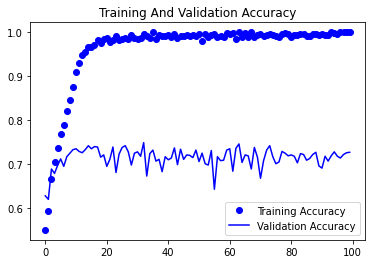

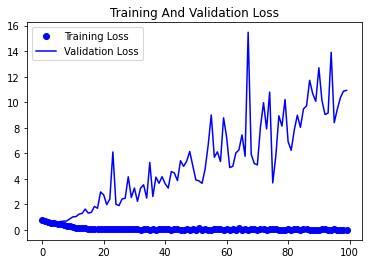

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

plt.show()

* 100의 반복결과 Training Accuracy는 100퍼센트에 가까워지는 반면 Validation Accuracy는 7~80%에 머물러 있음을 알 수 있다.  
* 이는 Training Data에 Overfitting되어있음을 알 수 있다.(알고 있는 데이터에 대해서는 잘 작동하지만 알지 못한 데이터에 대해서는 잘 작동하지 않음을 의미한다.)
* 'Overfitting'을 방지하기 위한 방법으로 'Data Augmentation'을 해보도록하자.(주어진 데이터를 'rotate', 'squash'등을 이용하여 변형시켜 training data로 사용하는 것이다.)


'Data Augmentation'은 `ImageDataGenerator`를 이용하여 간단하게 코딩할 수 있다. 다음과 같다.

```
train_datagen = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range = 0.2,
  heigth_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True,
  fill_mode = 'nearest')
```


다음은 Augmentaion을 할 때 사용하는 대표적인 options들이다. 알아두도록 하자.

* rotation_range : 0~180값으로 임의로 회전을 줄 수 있다.
* width_shift & height_shift : 수직 또는 수평으로 임의로 움직일 수 있다.
* shear_range : 임의로 shearing transformation시킬 수 있다.
* zoom_range : 임의로 image를 확대 할 수 있다.
* horizontal_flip : 수평으로 뒤집을 때 사용한다.(좌우반전)
* fill_mode : 회전, 폭/높이 이동 후에 나타나는 빈 셀을 채울 때 사용한다.

In [10]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-01-04 13:26:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.12.240, 172.217.5.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   128MB/s    in 0.5s    

2021-01-04 13:26:32 (128 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = RMSprop(lr = .001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/100
100/100 - 17s - loss: 0.7860 - acc: 0.5220 - val_loss: 0.6867 - val_acc: 0.5020
Epoch 2/100
100/100 - 16s - loss: 0.6889 - acc: 0.5425 - val_loss: 0.6518 - val_acc: 0.6150
Epoch 3/100
100/100 - 16s - loss: 0.6704 - acc: 0.6005 - val_loss: 0.6607 - val_acc: 0.5700
Epoch 4/100
100/100 - 16s - loss: 0.6655 - acc: 0.6255 - val_loss: 0.6149 - val_acc: 0.6700
Epoch 5/100
100/100 - 16s - loss: 0.6602 - acc: 0.6355 - val_loss: 0.5904 - val_acc: 0.6790
Epoch 6/100
100/100 - 16s - loss: 0.6322 - acc: 0.6530 - val_loss: 0.7355 - val_acc: 0.5810
Epoch 7/100
100/100 - 16s - loss: 0.6369 - acc: 0.6575 - val_loss: 0.5348 - val_acc: 0.7290
Epoch 8/100
100/100 - 16s - loss: 0.6306 - acc: 0.6555 - val_loss: 0.5403 - val_acc: 0.7130
Epoch 9/100
100/100 - 16s - loss: 0.6133 - acc: 0.6805 - val_loss: 0.5428 - val_acc: 0.7360
Epoch 10/100
100/100 - 17s - loss: 0.6062 - acc: 0.6715 - val_loss: 0.5765 - val_acc: 0.6900
Epoch 11/100
100/100 - 16s - loss: 0.5949 - acc: 0.6800 - val_loss: 0.5586 - va

여기서는 validation과 train에서 모두 정확도가 점차적으로 올라가는 것을 볼 수 있다.  
다만, 참고해야 할 것은 Augmentation의 경우 무작위성을 바탕으로 Augmentate하는 것이기 떄문에 train데이터만 무작위성이 있고 validation data에는 없다면 Augmentation을 하는 것은 큰 의미가 없을 수 있다는 것을 명심하자!

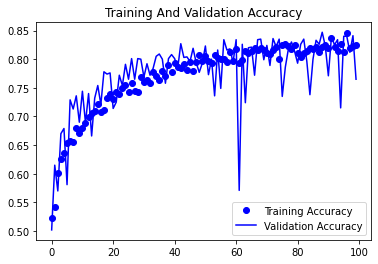

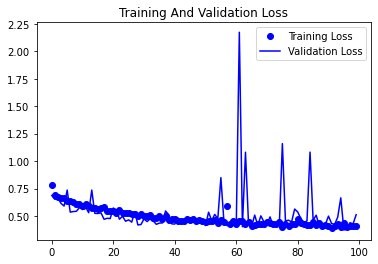

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

plt.show()